### 1 数据集介绍 

数据集地址：https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#   

数据集说明：  
    MN DoT ATR站每小时94号州际公路交通流量，地址在明尼阿波利斯和明尼苏达州圣保罗之间。   
    包括每小时天气特征和节假日和每小时天气特征和节假日对交通量的影响。  
    样本数48204个，特征属性8个，目标值1个。
    
特征属性：  
holiday：Categorical US National holidays plus regional holiday, Minnesota State Fair，所有样本值为None。  
temp： Numeric Average temp in kelvin，开尔文数值平均温度。  
rain_1h：Numeric Amount in mm of rain that occurred in the hour，每小时的降雨数量。  
snow_1h：Numeric Amount in mm of snow that occurred in the hour，每小时的降雪数量。  
clouds_all：Numeric Percentage of cloud cover，云量的百分比。  
weather_main：Categorical Short textual description of the current weather，天气的简单描述。  
weather_description：Categorical Longer textual description of the current weather，天气的详细描述。  
date_time：DateTime Hour of the data collected in local CST time，时间。  

目标值：  
traffic_volume：Numeric Hourly I-94 ATR 301 reported westbound traffic volume，每小时的交通流量。  


### 2 实战建模：使用多元线性回归

In [1]:
# 1 导入需要的模块、包等 
import torch 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch.nn as nn 


In [2]:
#  2 数据处理
# 2.1 读取文件  
data = pd.read_csv("./Metro_Interstate_Traffic_Volume.csv")

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# 2.2 将特征属性和目标值分开 

feature = data.iloc[:,0:-1]
target = data.iloc[:,-1]


In [5]:
feature

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00
5,None,291.72,0.00,0.0,1,Clear,sky is clear,2012-10-02 14:00:00
6,None,293.17,0.00,0.0,1,Clear,sky is clear,2012-10-02 15:00:00
7,None,293.86,0.00,0.0,1,Clear,sky is clear,2012-10-02 16:00:00
8,None,294.14,0.00,0.0,20,Clouds,few clouds,2012-10-02 17:00:00
9,None,293.10,0.00,0.0,20,Clouds,few clouds,2012-10-02 18:00:00


In [6]:
target

0        5545
1        4516
2        4767
3        5026
4        4918
5        5181
6        5584
7        6015
8        5791
9        4770
10       3539
11       2784
12       2361
13       1529
14        963
15        506
16        321
17        273
18        367
19        814
20       2718
21       5673
22       6511
23       5471
24       5097
25       4887
26       5337
27       5692
28       6137
29       4623
         ... 
48174    3338
48175    2950
48176    2607
48177    3856
48178    1826
48179     920
48180     696
48181     364
48182     335
48183     444
48184     802
48185    1175
48186    2002
48187    2882
48188    3701
48189    4049
48190    4429
48191    4547
48192    4380
48193    4380
48194    4302
48195    4302
48196    4283
48197    4132
48198    3947
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64

In [7]:
# 2.3 删除无用属性holiday、weather_main、weather_main、weather_description和date_time
feature = feature.iloc[:,1:5]

In [8]:
feature

,temp,rain_1h,snow_1h,clouds_all
0,288.28,0.00,0.0,40
1,289.36,0.00,0.0,75
2,289.58,0.00,0.0,90
3,290.13,0.00,0.0,90
4,291.14,0.00,0.0,75
5,291.72,0.00,0.0,1
6,293.17,0.00,0.0,1
7,293.86,0.00,0.0,1
8,294.14,0.00,0.0,20
9,293.10,0.00,0.0,20


In [9]:
# 2.4 特征数据归一化处理 

for i in range(feature.shape[1]):
    if i == 0 or i == 3:
        min_f, max_f = min(feature.iloc[:, i]), max(feature.iloc[:, i])
        diff = max_f - min_f
        for j in range(feature.shape[0]):
            feature.loc[j, i] = feature.iloc[j, i] / diff
            
  

In [10]:
feature = feature.iloc[:,[4,5,1,2]]

In [12]:
feature

,0,3,rain_1h,snow_1h
0,0.929726,0.40,0.00,0.0
1,0.933209,0.75,0.00,0.0
2,0.933918,0.90,0.00,0.0
3,0.935692,0.90,0.00,0.0
4,0.938949,0.75,0.00,0.0
5,0.940820,0.01,0.00,0.0
6,0.945496,0.01,0.00,0.0
7,0.947721,0.01,0.00,0.0
8,0.948625,0.20,0.00,0.0
9,0.945270,0.20,0.00,0.0


In [13]:
# 2.5 目标数据归一化
target_ = (target-min(target))/(max(target)-min(target))

In [14]:
target_

0        0.761676
1        0.620330
2        0.654808
3        0.690385
4        0.675549
5        0.711676
6        0.767033
7        0.826236
8        0.795467
9        0.655220
10       0.486126
11       0.382418
12       0.324313
13       0.210027
14       0.132280
15       0.069505
16       0.044093
17       0.037500
18       0.050412
19       0.111813
20       0.373352
21       0.779258
22       0.894368
23       0.751511
24       0.700137
25       0.671291
26       0.733104
27       0.781868
28       0.842995
29       0.635027
           ...   
48174    0.458516
48175    0.405220
48176    0.358104
48177    0.529670
48178    0.250824
48179    0.126374
48180    0.095604
48181    0.050000
48182    0.046016
48183    0.060989
48184    0.110165
48185    0.161401
48186    0.275000
48187    0.395879
48188    0.508379
48189    0.556181
48190    0.608379
48191    0.624588
48192    0.601648
48193    0.601648
48194    0.590934
48195    0.590934
48196    0.588324
48197    0.567582
48198    0

In [15]:
# 2.6 数据类型转换
print(type(feature))
print(type(target_))

print(type(feature.values))
print(type(target_.values))

x_feature = torch.from_numpy(feature.values).float()
y_target = torch.from_numpy(target_.values).float().unsqueeze(1)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
x_feature

tensor([[0.9297, 0.4000, 0.0000, 0.0000],
        [0.9332, 0.7500, 0.0000, 0.0000],
        [0.9339, 0.9000, 0.0000, 0.0000],
        ...,
        [0.9118, 0.9000, 0.0000, 0.0000],
        [0.9098, 0.9000, 0.0000, 0.0000],
        [0.9099, 0.9000, 0.0000, 0.0000]])

In [17]:
y_target

tensor([[0.7617],
        [0.6203],
        [0.6548],
        ...,
        [0.2966],
        [0.1992],
        [0.1310]])

In [18]:
# 3 创建模型 
class PolyLinearRegression(nn.Module):
    def __init__(self):
        super(PolyLinearRegression, self).__init__()
        self.ploy = nn.Linear(4, 1)

    def forward(self, x):
        out = self.ploy(x)
        return out


In [29]:
# 4 训练测试
def train_and_test():
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = PolyLinearRegression()
        model.to(device)
    else:
        device = torch.device("cpu")
        model = PolyLinearRegression()
        model.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

    loss_list = []
    for i in range(10000):
        i += 1

        inputs = x_feature.to(device)
        labels = y_target.to(device)

        # 1 前向传播
        output = model(inputs)
        # 计算损失
        loss = criterion(output, labels)

        # 2 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        loss.backward()
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 1 == 0:
            print("迭代次数：%d,  loss值：%.8f" % (i, loss.item()))
            loss_list.append(loss.item())

    # 测试模式
    model.eval()
    
    predict = model(x_feature).data.numpy()
    print(min(target),max(target))
    
    plt.plot(y_target[0:1000].numpy()*(max(target)-min(target))+min(target),"r")
    plt.plot(predict[0:1000]*(max(target)-min(target))+min(target),"b")
    plt.show()

    plt.plot(loss_list)
    plt.show()

迭代次数：1,  loss值：91.71772766
迭代次数：2,  loss值：33.04233170
迭代次数：3,  loss值：12.00544167
迭代次数：4,  loss值：4.46305132
迭代次数：5,  loss值：1.75880313
迭代次数：6,  loss值：0.78916883
迭代次数：7,  loss值：0.44144121
迭代次数：8,  loss值：0.31668532
迭代次数：9,  loss值：0.27187133
迭代次数：10,  loss值：0.25571889
迭代次数：11,  loss值：0.24984249
迭代次数：12,  loss值：0.24765043
迭代次数：13,  loss值：0.24677938
迭代次数：14,  loss值：0.24638200
迭代次数：15,  loss值：0.24615453
迭代次数：16,  loss值：0.24598804
迭代次数：17,  loss值：0.24584350
迭代次数：18,  loss值：0.24570689
迭代次数：19,  loss值：0.24557318
迭代次数：20,  loss值：0.24544062
迭代次数：21,  loss值：0.24530850
迭代次数：22,  loss值：0.24517664
迭代次数：23,  loss值：0.24504492
迭代次数：24,  loss值：0.24491331
迭代次数：25,  loss值：0.24478185
迭代次数：26,  loss值：0.24465047
迭代次数：27,  loss值：0.24451923
迭代次数：28,  loss值：0.24438809
迭代次数：29,  loss值：0.24425706
迭代次数：30,  loss值：0.24412613
迭代次数：31,  loss值：0.24399531
迭代次数：32,  loss值：0.24386461
迭代次数：33,  loss值：0.24373399
迭代次数：34,  loss值：0.24360350
迭代次数：35,  loss值：0.24347308
迭代次数：36,  loss值：0.24334279
迭代次数：37,  loss值：0.24321263
迭代次数：38

迭代次数：589,  loss值：0.18557972
迭代次数：590,  loss值：0.18549739
迭代次数：591,  loss值：0.18541513
迭代次数：592,  loss值：0.18533295
迭代次数：593,  loss值：0.18525085
迭代次数：594,  loss值：0.18516882
迭代次数：595,  loss值：0.18508685
迭代次数：596,  loss值：0.18500495
迭代次数：597,  loss值：0.18492310
迭代次数：598,  loss值：0.18484132
迭代次数：599,  loss值：0.18475962
迭代次数：600,  loss值：0.18467797
迭代次数：601,  loss值：0.18459640
迭代次数：602,  loss值：0.18451490
迭代次数：603,  loss值：0.18443348
迭代次数：604,  loss值：0.18435211
迭代次数：605,  loss值：0.18427081
迭代次数：606,  loss值：0.18418957
迭代次数：607,  loss值：0.18410841
迭代次数：608,  loss值：0.18402730
迭代次数：609,  loss值：0.18394628
迭代次数：610,  loss值：0.18386532
迭代次数：611,  loss值：0.18378444
迭代次数：612,  loss值：0.18370360
迭代次数：613,  loss值：0.18362282
迭代次数：614,  loss值：0.18354213
迭代次数：615,  loss值：0.18346149
迭代次数：616,  loss值：0.18338093
迭代次数：617,  loss值：0.18330044
迭代次数：618,  loss值：0.18322001
迭代次数：619,  loss值：0.18313964
迭代次数：620,  loss值：0.18305935
迭代次数：621,  loss值：0.18297911
迭代次数：622,  loss值：0.18289895
迭代次数：623,  loss值：0.18281884
迭代次数：624,  loss值：0.1

迭代次数：1167,  loss值：0.14773728
迭代次数：1168,  loss值：0.14768621
迭代次数：1169,  loss值：0.14763518
迭代次数：1170,  loss值：0.14758417
迭代次数：1171,  loss值：0.14753322
迭代次数：1172,  loss值：0.14748234
迭代次数：1173,  loss值：0.14743148
迭代次数：1174,  loss值：0.14738065
迭代次数：1175,  loss值：0.14732988
迭代次数：1176,  loss值：0.14727914
迭代次数：1177,  loss值：0.14722845
迭代次数：1178,  loss值：0.14717779
迭代次数：1179,  loss值：0.14712718
迭代次数：1180,  loss值：0.14707661
迭代次数：1181,  loss值：0.14702608
迭代次数：1182,  loss值：0.14697559
迭代次数：1183,  loss值：0.14692514
迭代次数：1184,  loss值：0.14687474
迭代次数：1185,  loss值：0.14682437
迭代次数：1186,  loss值：0.14677405
迭代次数：1187,  loss值：0.14672378
迭代次数：1188,  loss值：0.14667353
迭代次数：1189,  loss值：0.14662333
迭代次数：1190,  loss值：0.14657319
迭代次数：1191,  loss值：0.14652306
迭代次数：1192,  loss值：0.14647299
迭代次数：1193,  loss值：0.14642295
迭代次数：1194,  loss值：0.14637296
迭代次数：1195,  loss值：0.14632301
迭代次数：1196,  loss值：0.14627311
迭代次数：1197,  loss值：0.14622323
迭代次数：1198,  loss值：0.14617340
迭代次数：1199,  loss值：0.14612362
迭代次数：1200,  loss值：0.14607386
迭代次数：1201,  lo

迭代次数：1731,  loss值：0.12467800
迭代次数：1732,  loss值：0.12464585
迭代次数：1733,  loss值：0.12461375
迭代次数：1734,  loss值：0.12458166
迭代次数：1735,  loss值：0.12454958
迭代次数：1736,  loss值：0.12451755
迭代次数：1737,  loss值：0.12448554
迭代次数：1738,  loss值：0.12445355
迭代次数：1739,  loss值：0.12442159
迭代次数：1740,  loss值：0.12438967
迭代次数：1741,  loss值：0.12435776
迭代次数：1742,  loss值：0.12432588
迭代次数：1743,  loss值：0.12429401
迭代次数：1744,  loss值：0.12426219
迭代次数：1745,  loss值：0.12423039
迭代次数：1746,  loss值：0.12419862
迭代次数：1747,  loss值：0.12416685
迭代次数：1748,  loss值：0.12413514
迭代次数：1749,  loss值：0.12410344
迭代次数：1750,  loss值：0.12407177
迭代次数：1751,  loss值：0.12404013
迭代次数：1752,  loss值：0.12400851
迭代次数：1753,  loss值：0.12397692
迭代次数：1754,  loss值：0.12394535
迭代次数：1755,  loss值：0.12391381
迭代次数：1756,  loss值：0.12388230
迭代次数：1757,  loss值：0.12385081
迭代次数：1758,  loss值：0.12381934
迭代次数：1759,  loss值：0.12378789
迭代次数：1760,  loss值：0.12375649
迭代次数：1761,  loss值：0.12372509
迭代次数：1762,  loss值：0.12369372
迭代次数：1763,  loss值：0.12366240
迭代次数：1764,  loss值：0.12363108
迭代次数：1765,  lo

迭代次数：2295,  loss值：0.11014138
迭代次数：2296,  loss值：0.11012108
迭代次数：2297,  loss值：0.11010078
迭代次数：2298,  loss值：0.11008050
迭代次数：2299,  loss值：0.11006023
迭代次数：2300,  loss值：0.11003999
迭代次数：2301,  loss值：0.11001977
迭代次数：2302,  loss值：0.10999955
迭代次数：2303,  loss值：0.10997936
迭代次数：2304,  loss值：0.10995919
迭代次数：2305,  loss值：0.10993903
迭代次数：2306,  loss值：0.10991888
迭代次数：2307,  loss值：0.10989875
迭代次数：2308,  loss值：0.10987864
迭代次数：2309,  loss值：0.10985854
迭代次数：2310,  loss值：0.10983846
迭代次数：2311,  loss值：0.10981840
迭代次数：2312,  loss值：0.10979835
迭代次数：2313,  loss值：0.10977831
迭代次数：2314,  loss值：0.10975830
迭代次数：2315,  loss值：0.10973831
迭代次数：2316,  loss值：0.10971832
迭代次数：2317,  loss值：0.10969835
迭代次数：2318,  loss值：0.10967841
迭代次数：2319,  loss值：0.10965848
迭代次数：2320,  loss值：0.10963856
迭代次数：2321,  loss值：0.10961866
迭代次数：2322,  loss值：0.10959877
迭代次数：2323,  loss值：0.10957891
迭代次数：2324,  loss值：0.10955905
迭代次数：2325,  loss值：0.10953922
迭代次数：2326,  loss值：0.10951939
迭代次数：2327,  loss值：0.10949958
迭代次数：2328,  loss值：0.10947979
迭代次数：2329,  lo

迭代次数：2859,  loss值：0.10093271
迭代次数：2860,  loss值：0.10091981
迭代次数：2861,  loss值：0.10090691
迭代次数：2862,  loss值：0.10089401
迭代次数：2863,  loss值：0.10088113
迭代次数：2864,  loss值：0.10086826
迭代次数：2865,  loss值：0.10085541
迭代次数：2866,  loss值：0.10084257
迭代次数：2867,  loss值：0.10082972
迭代次数：2868,  loss值：0.10081689
迭代次数：2869,  loss值：0.10080407
迭代次数：2870,  loss值：0.10079126
迭代次数：2871,  loss值：0.10077846
迭代次数：2872,  loss值：0.10076568
迭代次数：2873,  loss值：0.10075290
迭代次数：2874,  loss值：0.10074013
迭代次数：2875,  loss值：0.10072737
迭代次数：2876,  loss值：0.10071462
迭代次数：2877,  loss值：0.10070189
迭代次数：2878,  loss值：0.10068917
迭代次数：2879,  loss值：0.10067645
迭代次数：2880,  loss值：0.10066374
迭代次数：2881,  loss值：0.10065105
迭代次数：2882,  loss值：0.10063835
迭代次数：2883,  loss值：0.10062568
迭代次数：2884,  loss值：0.10061301
迭代次数：2885,  loss值：0.10060036
迭代次数：2886,  loss值：0.10058772
迭代次数：2887,  loss值：0.10057508
迭代次数：2888,  loss值：0.10056245
迭代次数：2889,  loss值：0.10054983
迭代次数：2890,  loss值：0.10053723
迭代次数：2891,  loss值：0.10052464
迭代次数：2892,  loss值：0.10051205
迭代次数：2893,  lo

迭代次数：3423,  loss值：0.09505612
迭代次数：3424,  loss值：0.09504784
迭代次数：3425,  loss值：0.09503956
迭代次数：3426,  loss值：0.09503129
迭代次数：3427,  loss值：0.09502303
迭代次数：3428,  loss值：0.09501477
迭代次数：3429,  loss值：0.09500653
迭代次数：3430,  loss值：0.09499829
迭代次数：3431,  loss值：0.09499005
迭代次数：3432,  loss值：0.09498181
迭代次数：3433,  loss值：0.09497359
迭代次数：3434,  loss值：0.09496537
迭代次数：3435,  loss值：0.09495717
迭代次数：3436,  loss值：0.09494896
迭代次数：3437,  loss值：0.09494077
迭代次数：3438,  loss值：0.09493258
迭代次数：3439,  loss值：0.09492439
迭代次数：3440,  loss值：0.09491620
迭代次数：3441,  loss值：0.09490803
迭代次数：3442,  loss值：0.09489987
迭代次数：3443,  loss值：0.09489171
迭代次数：3444,  loss值：0.09488356
迭代次数：3445,  loss值：0.09487541
迭代次数：3446,  loss值：0.09486727
迭代次数：3447,  loss值：0.09485913
迭代次数：3448,  loss值：0.09485099
迭代次数：3449,  loss值：0.09484288
迭代次数：3450,  loss值：0.09483477
迭代次数：3451,  loss值：0.09482666
迭代次数：3452,  loss值：0.09481856
迭代次数：3453,  loss值：0.09481046
迭代次数：3454,  loss值：0.09480236
迭代次数：3455,  loss值：0.09479428
迭代次数：3456,  loss值：0.09478620
迭代次数：3457,  lo

迭代次数：3987,  loss值：0.09126475
迭代次数：3988,  loss值：0.09125937
迭代次数：3989,  loss值：0.09125399
迭代次数：3990,  loss值：0.09124861
迭代次数：3991,  loss值：0.09124324
迭代次数：3992,  loss值：0.09123787
迭代次数：3993,  loss值：0.09123250
迭代次数：3994,  loss值：0.09122714
迭代次数：3995,  loss值：0.09122179
迭代次数：3996,  loss值：0.09121644
迭代次数：3997,  loss值：0.09121110
迭代次数：3998,  loss值：0.09120575
迭代次数：3999,  loss值：0.09120042
迭代次数：4000,  loss值：0.09119508
迭代次数：4001,  loss值：0.09118975
迭代次数：4002,  loss值：0.09118441
迭代次数：4003,  loss值：0.09117909
迭代次数：4004,  loss值：0.09117378
迭代次数：4005,  loss值：0.09116846
迭代次数：4006,  loss值：0.09116315
迭代次数：4007,  loss值：0.09115785
迭代次数：4008,  loss值：0.09115255
迭代次数：4009,  loss值：0.09114724
迭代次数：4010,  loss值：0.09114195
迭代次数：4011,  loss值：0.09113666
迭代次数：4012,  loss值：0.09113137
迭代次数：4013,  loss值：0.09112608
迭代次数：4014,  loss值：0.09112080
迭代次数：4015,  loss值：0.09111553
迭代次数：4016,  loss值：0.09111026
迭代次数：4017,  loss值：0.09110499
迭代次数：4018,  loss值：0.09109972
迭代次数：4019,  loss值：0.09109446
迭代次数：4020,  loss值：0.09108921
迭代次数：4021,  lo

迭代次数：4551,  loss值：0.08877955
迭代次数：4552,  loss值：0.08877598
迭代次数：4553,  loss值：0.08877242
迭代次数：4554,  loss值：0.08876886
迭代次数：4555,  loss值：0.08876531
迭代次数：4556,  loss值：0.08876175
迭代次数：4557,  loss值：0.08875820
迭代次数：4558,  loss值：0.08875465
迭代次数：4559,  loss值：0.08875109
迭代次数：4560,  loss值：0.08874755
迭代次数：4561,  loss值：0.08874401
迭代次数：4562,  loss值：0.08874046
迭代次数：4563,  loss值：0.08873692
迭代次数：4564,  loss值：0.08873338
迭代次数：4565,  loss值：0.08872984
迭代次数：4566,  loss值：0.08872631
迭代次数：4567,  loss值：0.08872279
迭代次数：4568,  loss值：0.08871926
迭代次数：4569,  loss值：0.08871574
迭代次数：4570,  loss值：0.08871222
迭代次数：4571,  loss值：0.08870870
迭代次数：4572,  loss值：0.08870518
迭代次数：4573,  loss值：0.08870167
迭代次数：4574,  loss值：0.08869816
迭代次数：4575,  loss值：0.08869465
迭代次数：4576,  loss值：0.08869114
迭代次数：4577,  loss值：0.08868763
迭代次数：4578,  loss值：0.08868413
迭代次数：4579,  loss值：0.08868063
迭代次数：4580,  loss值：0.08867714
迭代次数：4581,  loss值：0.08867364
迭代次数：4582,  loss值：0.08867016
迭代次数：4583,  loss值：0.08866667
迭代次数：4584,  loss值：0.08866318
迭代次数：4585,  lo

迭代次数：5115,  loss值：0.08711382
迭代次数：5116,  loss值：0.08711140
迭代次数：5117,  loss值：0.08710898
迭代次数：5118,  loss值：0.08710655
迭代次数：5119,  loss值：0.08710413
迭代次数：5120,  loss值：0.08710171
迭代次数：5121,  loss值：0.08709929
迭代次数：5122,  loss值：0.08709687
迭代次数：5123,  loss值：0.08709446
迭代次数：5124,  loss值：0.08709204
迭代次数：5125,  loss值：0.08708963
迭代次数：5126,  loss值：0.08708722
迭代次数：5127,  loss值：0.08708481
迭代次数：5128,  loss值：0.08708241
迭代次数：5129,  loss值：0.08708000
迭代次数：5130,  loss值：0.08707760
迭代次数：5131,  loss值：0.08707520
迭代次数：5132,  loss值：0.08707280
迭代次数：5133,  loss值：0.08707040
迭代次数：5134,  loss值：0.08706800
迭代次数：5135,  loss值：0.08706561
迭代次数：5136,  loss值：0.08706321
迭代次数：5137,  loss值：0.08706082
迭代次数：5138,  loss值：0.08705842
迭代次数：5139,  loss值：0.08705603
迭代次数：5140,  loss值：0.08705364
迭代次数：5141,  loss值：0.08705125
迭代次数：5142,  loss值：0.08704887
迭代次数：5143,  loss值：0.08704649
迭代次数：5144,  loss值：0.08704410
迭代次数：5145,  loss值：0.08704173
迭代次数：5146,  loss值：0.08703935
迭代次数：5147,  loss值：0.08703697
迭代次数：5148,  loss值：0.08703460
迭代次数：5149,  lo

迭代次数：5679,  loss值：0.08596335
迭代次数：5680,  loss值：0.08596164
迭代次数：5681,  loss值：0.08595993
迭代次数：5682,  loss值：0.08595823
迭代次数：5683,  loss值：0.08595652
迭代次数：5684,  loss值：0.08595482
迭代次数：5685,  loss值：0.08595312
迭代次数：5686,  loss值：0.08595142
迭代次数：5687,  loss值：0.08594972
迭代次数：5688,  loss值：0.08594802
迭代次数：5689,  loss值：0.08594632
迭代次数：5690,  loss值：0.08594462
迭代次数：5691,  loss值：0.08594293
迭代次数：5692,  loss值：0.08594123
迭代次数：5693,  loss值：0.08593953
迭代次数：5694,  loss值：0.08593784
迭代次数：5695,  loss值：0.08593615
迭代次数：5696,  loss值：0.08593446
迭代次数：5697,  loss值：0.08593277
迭代次数：5698,  loss值：0.08593108
迭代次数：5699,  loss值：0.08592939
迭代次数：5700,  loss值：0.08592770
迭代次数：5701,  loss值：0.08592601
迭代次数：5702,  loss值：0.08592433
迭代次数：5703,  loss值：0.08592264
迭代次数：5704,  loss值：0.08592097
迭代次数：5705,  loss值：0.08591928
迭代次数：5706,  loss值：0.08591760
迭代次数：5707,  loss值：0.08591592
迭代次数：5708,  loss值：0.08591424
迭代次数：5709,  loss值：0.08591256
迭代次数：5710,  loss值：0.08591089
迭代次数：5711,  loss值：0.08590921
迭代次数：5712,  loss值：0.08590753
迭代次数：5713,  lo

迭代次数：6243,  loss值：0.08513800
迭代次数：6244,  loss值：0.08513675
迭代次数：6245,  loss值：0.08513550
迭代次数：6246,  loss值：0.08513425
迭代次数：6247,  loss值：0.08513299
迭代次数：6248,  loss值：0.08513174
迭代次数：6249,  loss值：0.08513049
迭代次数：6250,  loss值：0.08512924
迭代次数：6251,  loss值：0.08512799
迭代次数：6252,  loss值：0.08512674
迭代次数：6253,  loss值：0.08512550
迭代次数：6254,  loss值：0.08512425
迭代次数：6255,  loss值：0.08512300
迭代次数：6256,  loss值：0.08512176
迭代次数：6257,  loss值：0.08512051
迭代次数：6258,  loss值：0.08511928
迭代次数：6259,  loss值：0.08511803
迭代次数：6260,  loss值：0.08511679
迭代次数：6261,  loss值：0.08511554
迭代次数：6262,  loss值：0.08511431
迭代次数：6263,  loss值：0.08511306
迭代次数：6264,  loss值：0.08511182
迭代次数：6265,  loss值：0.08511058
迭代次数：6266,  loss值：0.08510935
迭代次数：6267,  loss值：0.08510811
迭代次数：6268,  loss值：0.08510687
迭代次数：6269,  loss值：0.08510563
迭代次数：6270,  loss值：0.08510439
迭代次数：6271,  loss值：0.08510315
迭代次数：6272,  loss值：0.08510192
迭代次数：6273,  loss值：0.08510068
迭代次数：6274,  loss值：0.08509945
迭代次数：6275,  loss值：0.08509821
迭代次数：6276,  loss值：0.08509699
迭代次数：6277,  lo

迭代次数：6807,  loss值：0.08451892
迭代次数：6808,  loss值：0.08451795
迭代次数：6809,  loss值：0.08451699
迭代次数：6810,  loss值：0.08451603
迭代次数：6811,  loss值：0.08451506
迭代次数：6812,  loss值：0.08451410
迭代次数：6813,  loss值：0.08451314
迭代次数：6814,  loss值：0.08451218
迭代次数：6815,  loss值：0.08451122
迭代次数：6816,  loss值：0.08451026
迭代次数：6817,  loss值：0.08450931
迭代次数：6818,  loss值：0.08450834
迭代次数：6819,  loss值：0.08450738
迭代次数：6820,  loss值：0.08450642
迭代次数：6821,  loss值：0.08450547
迭代次数：6822,  loss值：0.08450451
迭代次数：6823,  loss值：0.08450355
迭代次数：6824,  loss值：0.08450260
迭代次数：6825,  loss值：0.08450164
迭代次数：6826,  loss值：0.08450069
迭代次数：6827,  loss值：0.08449973
迭代次数：6828,  loss值：0.08449877
迭代次数：6829,  loss值：0.08449782
迭代次数：6830,  loss值：0.08449686
迭代次数：6831,  loss值：0.08449591
迭代次数：6832,  loss值：0.08449496
迭代次数：6833,  loss值：0.08449400
迭代次数：6834,  loss值：0.08449305
迭代次数：6835,  loss值：0.08449209
迭代次数：6836,  loss值：0.08449114
迭代次数：6837,  loss值：0.08449019
迭代次数：6838,  loss值：0.08448924
迭代次数：6839,  loss值：0.08448829
迭代次数：6840,  loss值：0.08448733
迭代次数：6841,  lo

迭代次数：7371,  loss值：0.08403178
迭代次数：7372,  loss值：0.08403101
迭代次数：7373,  loss值：0.08403023
迭代次数：7374,  loss值：0.08402945
迭代次数：7375,  loss值：0.08402868
迭代次数：7376,  loss值：0.08402790
迭代次数：7377,  loss值：0.08402713
迭代次数：7378,  loss值：0.08402634
迭代次数：7379,  loss值：0.08402557
迭代次数：7380,  loss值：0.08402479
迭代次数：7381,  loss值：0.08402402
迭代次数：7382,  loss值：0.08402324
迭代次数：7383,  loss值：0.08402247
迭代次数：7384,  loss值：0.08402170
迭代次数：7385,  loss值：0.08402093
迭代次数：7386,  loss值：0.08402015
迭代次数：7387,  loss值：0.08401939
迭代次数：7388,  loss值：0.08401861
迭代次数：7389,  loss值：0.08401784
迭代次数：7390,  loss值：0.08401707
迭代次数：7391,  loss值：0.08401629
迭代次数：7392,  loss值：0.08401552
迭代次数：7393,  loss值：0.08401475
迭代次数：7394,  loss值：0.08401398
迭代次数：7395,  loss值：0.08401321
迭代次数：7396,  loss值：0.08401243
迭代次数：7397,  loss值：0.08401167
迭代次数：7398,  loss值：0.08401089
迭代次数：7399,  loss值：0.08401012
迭代次数：7400,  loss值：0.08400936
迭代次数：7401,  loss值：0.08400858
迭代次数：7402,  loss值：0.08400781
迭代次数：7403,  loss值：0.08400705
迭代次数：7404,  loss值：0.08400628
迭代次数：7405,  lo

迭代次数：7935,  loss值：0.08363006
迭代次数：7936,  loss值：0.08362940
迭代次数：7937,  loss值：0.08362874
迭代次数：7938,  loss值：0.08362809
迭代次数：7939,  loss值：0.08362743
迭代次数：7940,  loss值：0.08362678
迭代次数：7941,  loss值：0.08362612
迭代次数：7942,  loss值：0.08362547
迭代次数：7943,  loss值：0.08362481
迭代次数：7944,  loss值：0.08362416
迭代次数：7945,  loss值：0.08362351
迭代次数：7946,  loss值：0.08362285
迭代次数：7947,  loss值：0.08362219
迭代次数：7948,  loss值：0.08362155
迭代次数：7949,  loss值：0.08362089
迭代次数：7950,  loss值：0.08362024
迭代次数：7951,  loss值：0.08361959
迭代次数：7952,  loss值：0.08361893
迭代次数：7953,  loss值：0.08361828
迭代次数：7954,  loss值：0.08361763
迭代次数：7955,  loss值：0.08361697
迭代次数：7956,  loss值：0.08361632
迭代次数：7957,  loss值：0.08361567
迭代次数：7958,  loss值：0.08361502
迭代次数：7959,  loss值：0.08361436
迭代次数：7960,  loss值：0.08361372
迭代次数：7961,  loss值：0.08361306
迭代次数：7962,  loss值：0.08361241
迭代次数：7963,  loss值：0.08361176
迭代次数：7964,  loss值：0.08361111
迭代次数：7965,  loss值：0.08361046
迭代次数：7966,  loss值：0.08360980
迭代次数：7967,  loss值：0.08360916
迭代次数：7968,  loss值：0.08360851
迭代次数：7969,  lo

迭代次数：8499,  loss值：0.08328456
迭代次数：8500,  loss值：0.08328399
迭代次数：8501,  loss值：0.08328342
迭代次数：8502,  loss值：0.08328284
迭代次数：8503,  loss值：0.08328227
迭代次数：8504,  loss值：0.08328170
迭代次数：8505,  loss值：0.08328112
迭代次数：8506,  loss值：0.08328055
迭代次数：8507,  loss值：0.08327997
迭代次数：8508,  loss值：0.08327940
迭代次数：8509,  loss值：0.08327883
迭代次数：8510,  loss值：0.08327825
迭代次数：8511,  loss值：0.08327768
迭代次数：8512,  loss值：0.08327711
迭代次数：8513,  loss值：0.08327653
迭代次数：8514,  loss值：0.08327596
迭代次数：8515,  loss值：0.08327539
迭代次数：8516,  loss值：0.08327482
迭代次数：8517,  loss值：0.08327425
迭代次数：8518,  loss值：0.08327367
迭代次数：8519,  loss值：0.08327310
迭代次数：8520,  loss值：0.08327252
迭代次数：8521,  loss值：0.08327196
迭代次数：8522,  loss值：0.08327138
迭代次数：8523,  loss值：0.08327081
迭代次数：8524,  loss值：0.08327024
迭代次数：8525,  loss值：0.08326966
迭代次数：8526,  loss值：0.08326910
迭代次数：8527,  loss值：0.08326852
迭代次数：8528,  loss值：0.08326795
迭代次数：8529,  loss值：0.08326738
迭代次数：8530,  loss值：0.08326681
迭代次数：8531,  loss值：0.08326624
迭代次数：8532,  loss值：0.08326566
迭代次数：8533,  lo

迭代次数：9063,  loss值：0.08297703
迭代次数：9064,  loss值：0.08297651
迭代次数：9065,  loss值：0.08297599
迭代次数：9066,  loss值：0.08297547
迭代次数：9067,  loss值：0.08297495
迭代次数：9068,  loss值：0.08297443
迭代次数：9069,  loss值：0.08297391
迭代次数：9070,  loss值：0.08297340
迭代次数：9071,  loss值：0.08297288
迭代次数：9072,  loss值：0.08297236
迭代次数：9073,  loss值：0.08297184
迭代次数：9074,  loss值：0.08297132
迭代次数：9075,  loss值：0.08297081
迭代次数：9076,  loss值：0.08297028
迭代次数：9077,  loss值：0.08296977
迭代次数：9078,  loss值：0.08296925
迭代次数：9079,  loss值：0.08296873
迭代次数：9080,  loss值：0.08296821
迭代次数：9081,  loss值：0.08296770
迭代次数：9082,  loss值：0.08296718
迭代次数：9083,  loss值：0.08296666
迭代次数：9084,  loss值：0.08296614
迭代次数：9085,  loss值：0.08296562
迭代次数：9086,  loss值：0.08296511
迭代次数：9087,  loss值：0.08296459
迭代次数：9088,  loss值：0.08296407
迭代次数：9089,  loss值：0.08296356
迭代次数：9090,  loss值：0.08296304
迭代次数：9091,  loss值：0.08296252
迭代次数：9092,  loss值：0.08296201
迭代次数：9093,  loss值：0.08296149
迭代次数：9094,  loss值：0.08296097
迭代次数：9095,  loss值：0.08296046
迭代次数：9096,  loss值：0.08295994
迭代次数：9097,  lo

迭代次数：9627,  loss值：0.08269591
迭代次数：9628,  loss值：0.08269543
迭代次数：9629,  loss值：0.08269496
迭代次数：9630,  loss值：0.08269447
迭代次数：9631,  loss值：0.08269399
迭代次数：9632,  loss值：0.08269352
迭代次数：9633,  loss值：0.08269303
迭代次数：9634,  loss值：0.08269256
迭代次数：9635,  loss值：0.08269208
迭代次数：9636,  loss值：0.08269160
迭代次数：9637,  loss值：0.08269112
迭代次数：9638,  loss值：0.08269064
迭代次数：9639,  loss值：0.08269016
迭代次数：9640,  loss值：0.08268969
迭代次数：9641,  loss值：0.08268920
迭代次数：9642,  loss值：0.08268873
迭代次数：9643,  loss值：0.08268825
迭代次数：9644,  loss值：0.08268777
迭代次数：9645,  loss值：0.08268729
迭代次数：9646,  loss值：0.08268681
迭代次数：9647,  loss值：0.08268633
迭代次数：9648,  loss值：0.08268586
迭代次数：9649,  loss值：0.08268537
迭代次数：9650,  loss值：0.08268490
迭代次数：9651,  loss值：0.08268442
迭代次数：9652,  loss值：0.08268394
迭代次数：9653,  loss值：0.08268346
迭代次数：9654,  loss值：0.08268298
迭代次数：9655,  loss值：0.08268251
迭代次数：9656,  loss值：0.08268203
迭代次数：9657,  loss值：0.08268155
迭代次数：9658,  loss值：0.08268107
迭代次数：9659,  loss值：0.08268059
迭代次数：9660,  loss值：0.08268011
迭代次数：9661,  lo

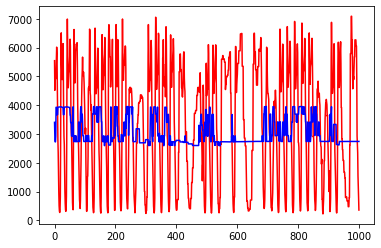

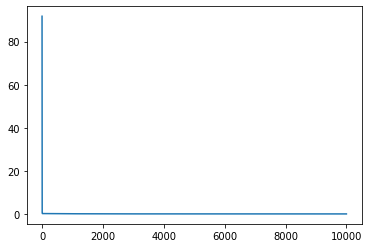

In [30]:
train_and_test()

In [75]:
# 保存模型和使用模型
# torch.save(model.state_dict(),"ploy_model.pt")
# model.load_state_dict(torch.load("model.pkl"))